## Problem Definition
This project analyzes cybersecurity breach data to identify patterns across years, attack types, and affected sectors.  
The goal is to understand trends in breaches and determine statistical relationships.  
We aim to predict which sectors and attack types are most vulnerable over time.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. load dataset :

In [3]:
df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")

 3. Basic Dataset Info

Displays the number of rows and columns in the dataset.

In [ ]:
print("\n Dataset Shape: ")
print(df.shape)


 Dataset Shape: 
(3000, 10)


In [5]:
print("\n First 5 Rows :")
print(df.head())


 First 5 Rows :
   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Firewall   
2  

Provides data types, non-null counts, and memory usage

In [6]:
print("\n info:")
print(df.info())


 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
None


Counts the number of missing values in each column. 

In [7]:
print("\n Missing Values :")
print(df.isnull().sum())


 Missing Values :
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [8]:
print("\n Data Types :" )
print(df.dtypes)


 Data Types :
Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object


In [9]:
#  Unique Values in Each Column 
print("\n Unique Values Per Column ")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")




 Unique Values Per Column 
Country: 10 unique values
Year: 10 unique values
Attack Type: 6 unique values
Target Industry: 7 unique values
Financial Loss (in Million $): 2536 unique values
Number of Affected Users: 2998 unique values
Attack Source: 4 unique values
Security Vulnerability Type: 4 unique values
Defense Mechanism Used: 5 unique values
Incident Resolution Time (in Hours): 72 unique values


Data Cleaning :


In [10]:

# 1. Remove duplicates
df.drop_duplicates(inplace=True)


# 2. Fill missing values
#    Numeric → Mean
#    Categorical → Mode

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)


# 3. Handle impossible/invalid values

numeric_cols = ['Financial Loss (in Million $)',
                'Number of Affected Users',
                'Incident Resolution Time (in Hours)']

for col in numeric_cols:
    mean_val = df[col].mean()
    df.loc[df[col] < 0, col] = mean_val

print("\n After Cleaning ")
print(df.info())
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())




 After Cleaning 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   float64
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 234.5+ KB
None

Missing Value

C:\Users\Nandini\AppData\Local\Temp\ipykernel_24896\3808767812.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Nandini\AppData\Local\Temp\ipykernel_24896\3808767812.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

 We assume imbalanced categories may affect model training.


C:\Users\Nandini\AppData\Local\Temp\ipykernel_24896\1423233497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set2", order=df[col].value_counts().index)


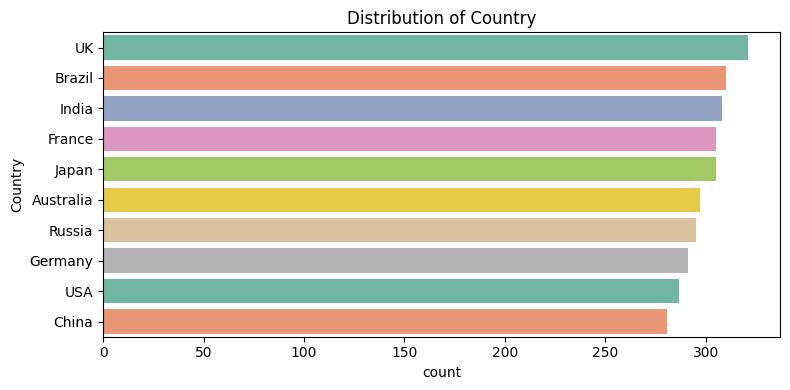

C:\Users\Nandini\AppData\Local\Temp\ipykernel_24896\1423233497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set2", order=df[col].value_counts().index)


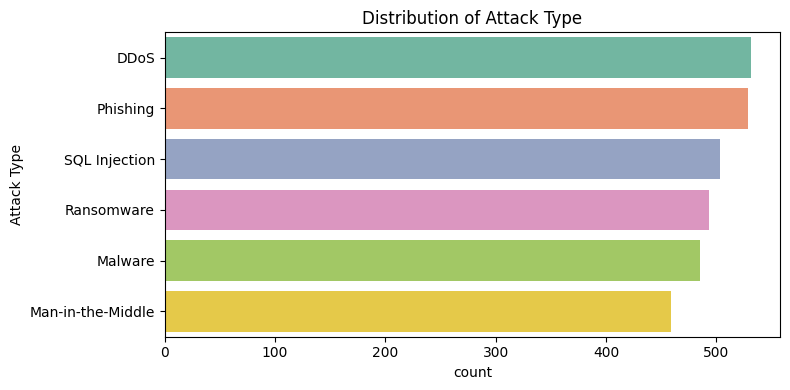

C:\Users\Nandini\AppData\Local\Temp\ipykernel_24896\1423233497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set2", order=df[col].value_counts().index)


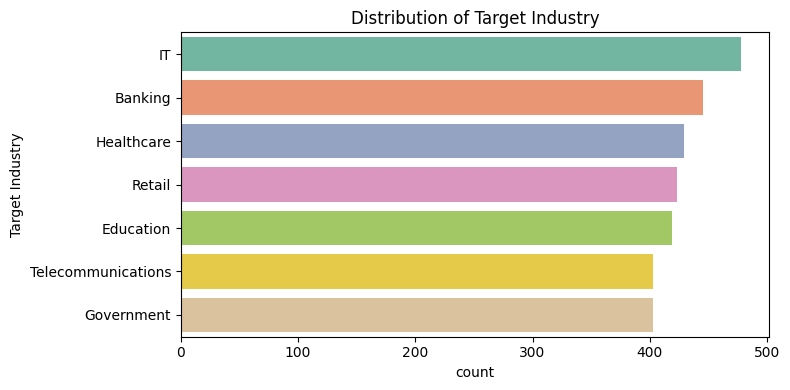

C:\Users\Nandini\AppData\Local\Temp\ipykernel_24896\1423233497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set2", order=df[col].value_counts().index)


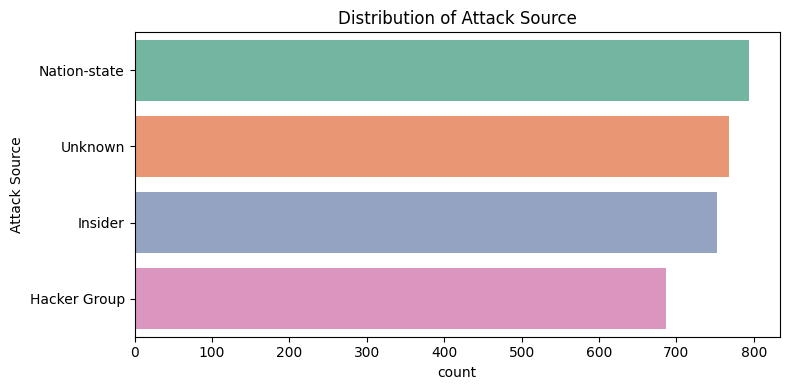

C:\Users\Nandini\AppData\Local\Temp\ipykernel_24896\1423233497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set2", order=df[col].value_counts().index)


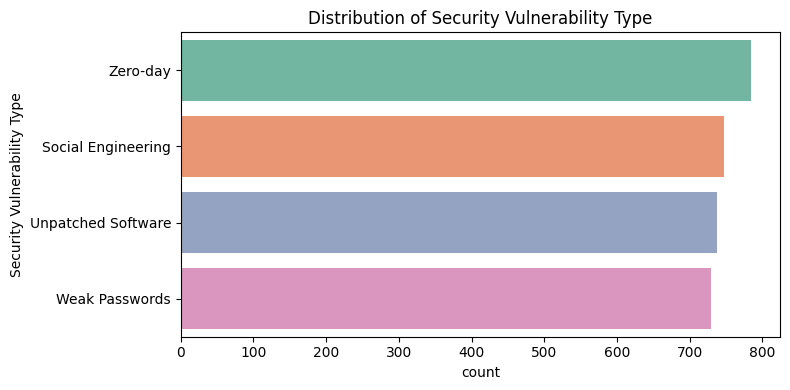

C:\Users\Nandini\AppData\Local\Temp\ipykernel_24896\1423233497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="Set2", order=df[col].value_counts().index)


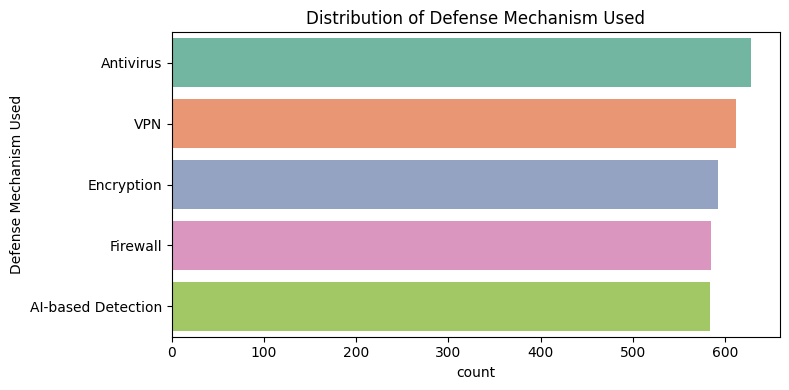

In [11]:
#  Categorical Data Distribution 
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, palette="Set2", order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()



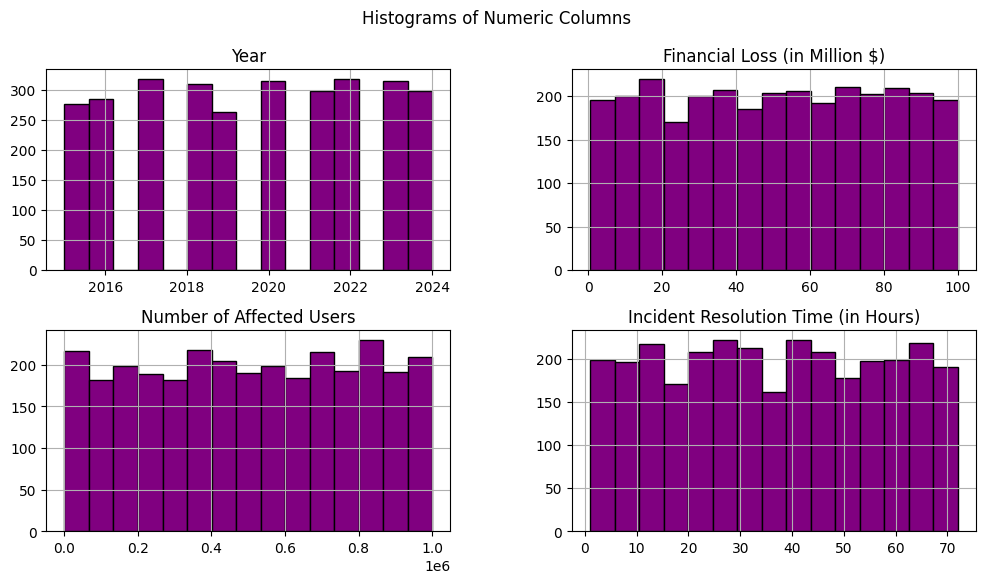

In [12]:
# Numerical Data Distribution
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=15, figsize=(12, 6), color='purple', edgecolor='black')
plt.suptitle("Histograms of Numeric Columns")
plt.show()



We assume stronger correlations may indicate multicollinearity.


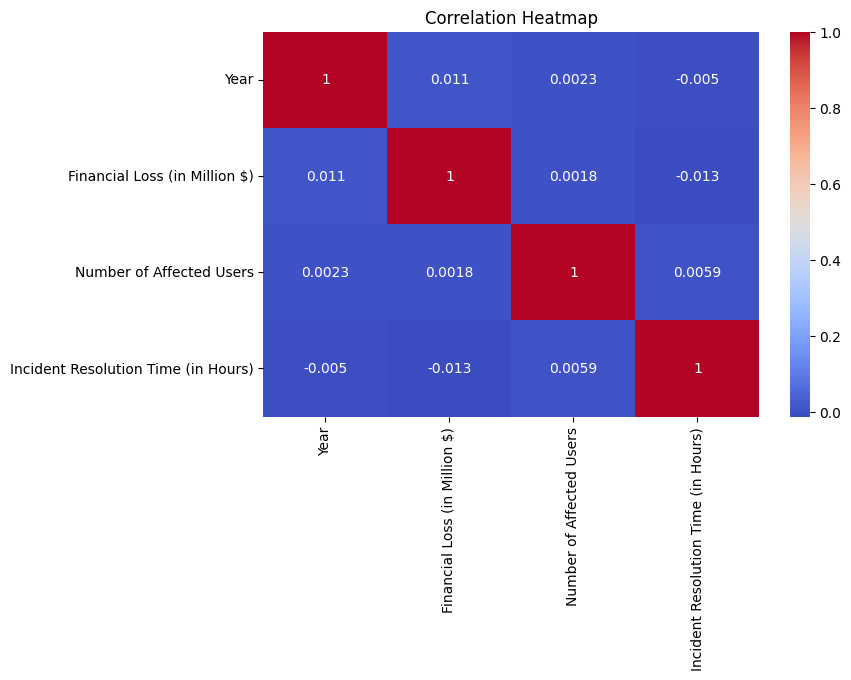

In [13]:
# Correlation Matrix 
plt.figure(figsize=(8, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Outliers detection :

In [16]:
df[['Financial Loss (in Million $)',
    'Number of Affected Users',
    'Incident Resolution Time (in Hours)']].describe()


,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000
mean,50.492970,504684.136333,36.476000
std,28.791415,289944.084972,20.570768
min,0.500000,424.000000,1.000000
25%,25.757500,255805.250000,19.000000
50%,50.795000,504513.000000,37.000000
75%,75.630000,758088.500000,55.000000
max,99.990000,999635.000000,72.000000


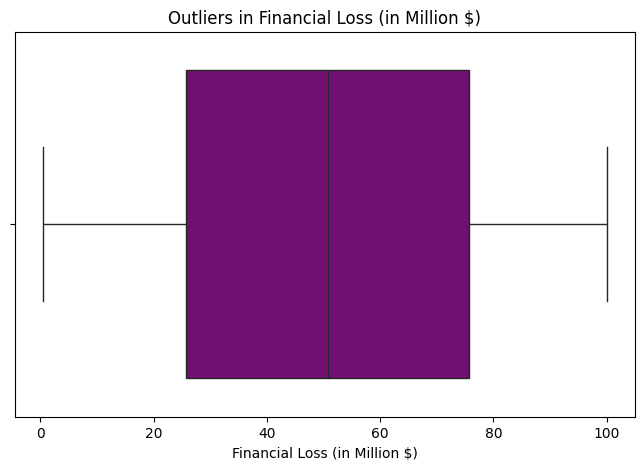

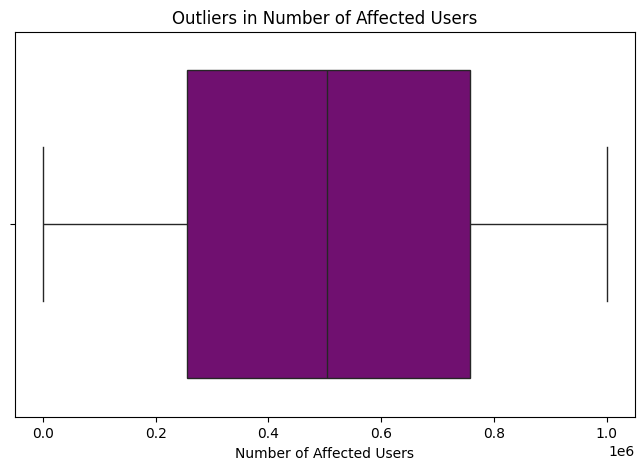

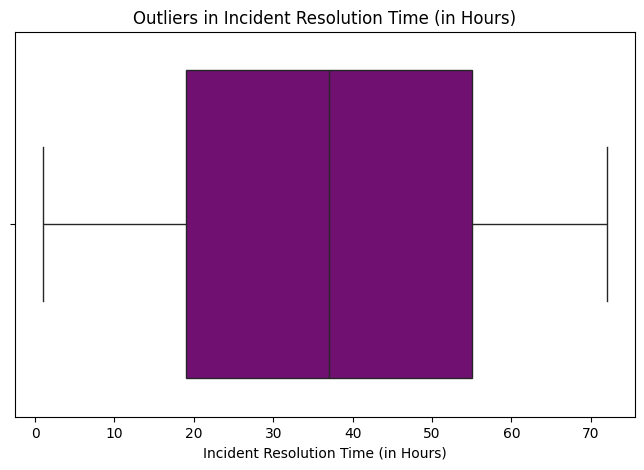

In [15]:

for col in ['Financial Loss (in Million $)',
    'Number of Affected Users',
    'Incident Resolution Time (in Hours)']:
  
    plt.figure(figsize=(8, 5))  
    sns.boxplot(x=df[col], color="purple")
    plt.title(f"Outliers in {col}")
    plt.show()

Insights from visualization : Boxplot highlights spread and outliers of a variable.

cross Tab analysis 

This gives us a frequency table showing how many times each defense mechanism was applied to different vulnerability types.


Crosstab: Vulnerability vs Defense
Defense Mechanism Used       AI-based Detection  Antivirus  Encryption  \
Security Vulnerability Type                                              
Social Engineering                          144        156         143   
Unpatched Software                          135        152         151   
Weak Passwords                              139        163         150   
Zero-day                                    165        157         148   

Defense Mechanism Used       Firewall  VPN  
Security Vulnerability Type                 
Social Engineering                152  152  
Unpatched Software                150  150  
Weak Passwords                    134  144  
Zero-day                          149  166  


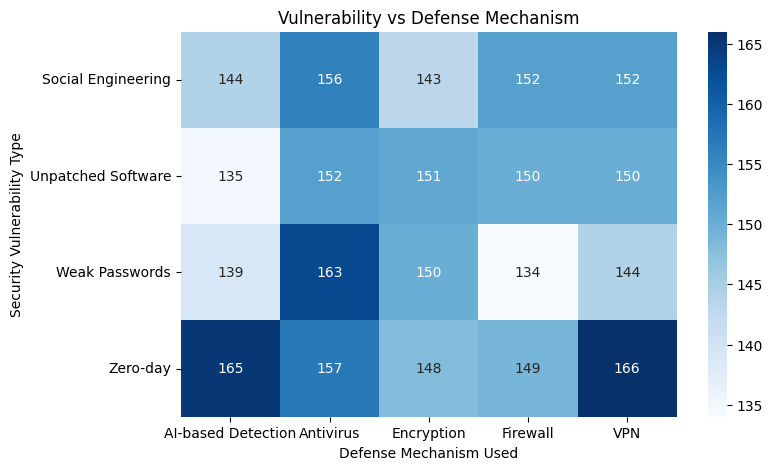

In [ ]:
crosstab_data = pd.crosstab(df['Security Vulnerability Type'], df['Defense Mechanism Used'])
print("\nCrosstab: Vulnerability vs Defense")
print(crosstab_data)

plt.figure(figsize=(8,5))
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='Blues')
plt.title("Vulnerability vs Defense Mechanism")
plt.show()

Heatmap shows correlations or missing values visually.

Univarient Analysis :

Shows the spread and shape of each numeric variable.

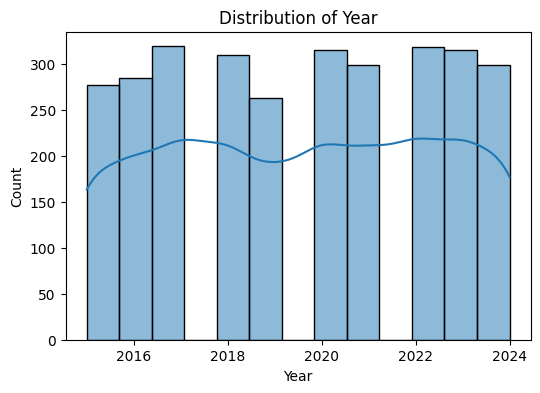

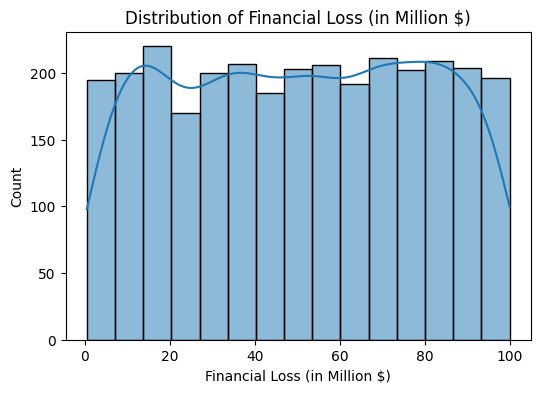

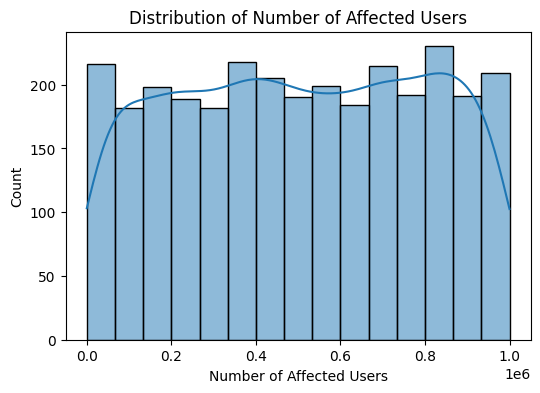

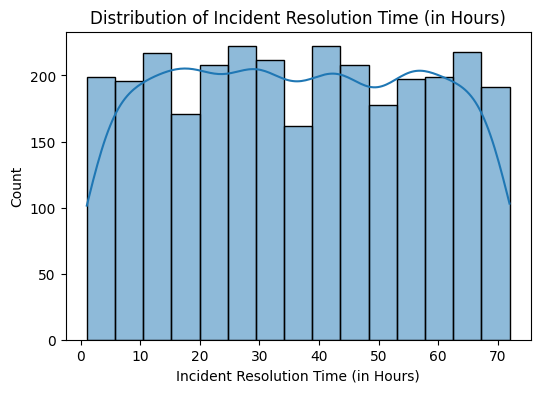

In [17]:

# Numerical distributions
num_cols = df.select_dtypes(include=np.number).columns
# for each numeric column
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()



Insights from Visualization: Histogram shows distribution of numerical feature

Shows the frequency distribution of categorical variables.

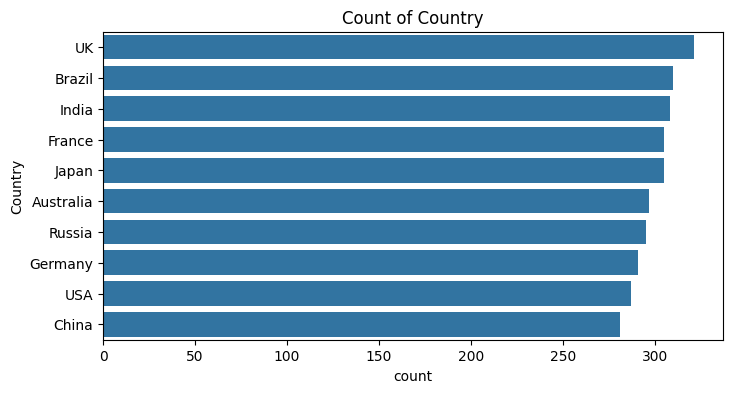

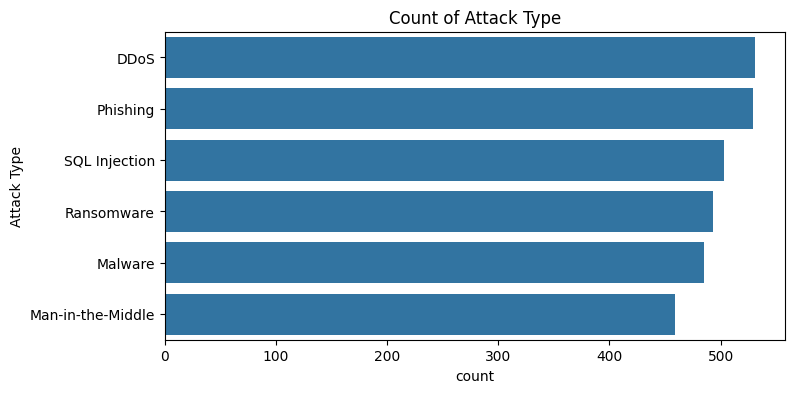

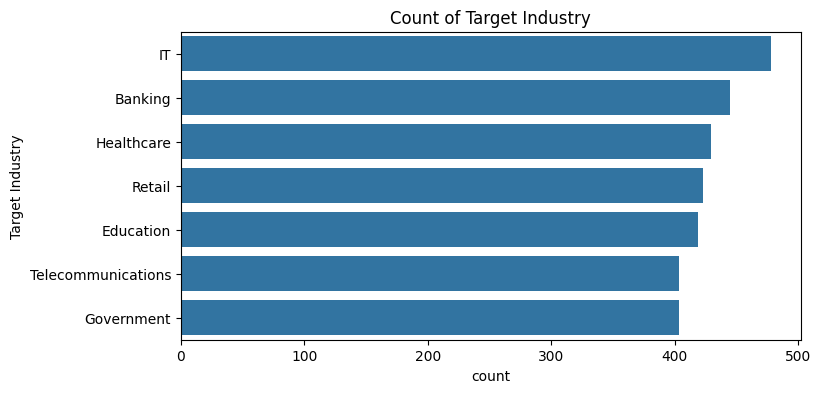

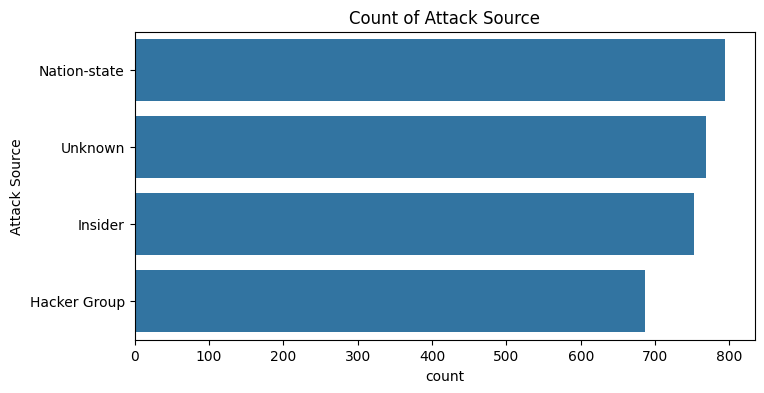

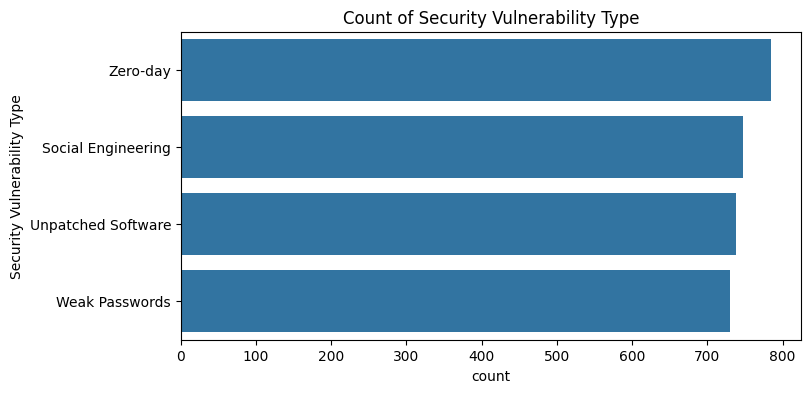

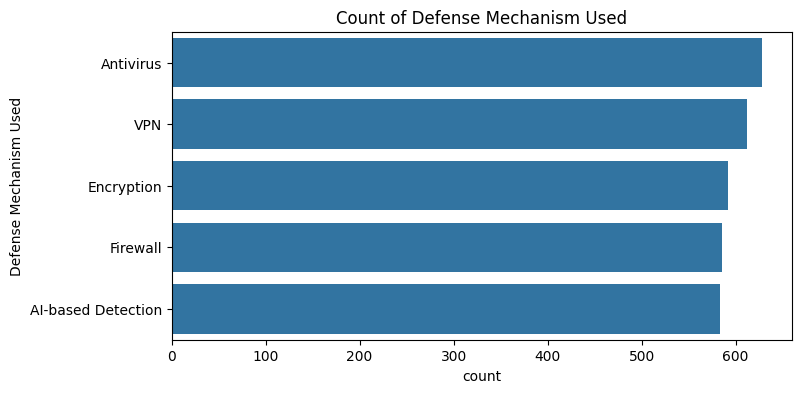

In [18]:
# Categorical counts
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()

We assume imbalanced categories may affect model training.



Bivariate Analysis :


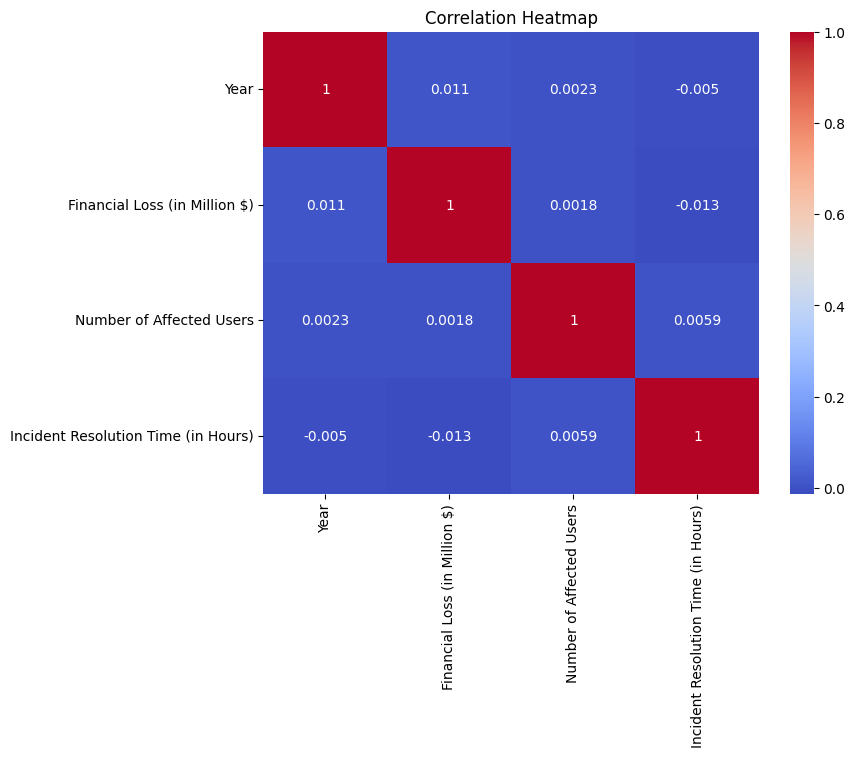

In [ ]:
# Numerical vs Numerical (correlation)
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Multivariate Analysis :


C:\Users\Nandini\AppData\Local\Temp\ipykernel_13628\1554572054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attack Type', y='Financial Loss (in Million $)', data=df, palette="plasma")


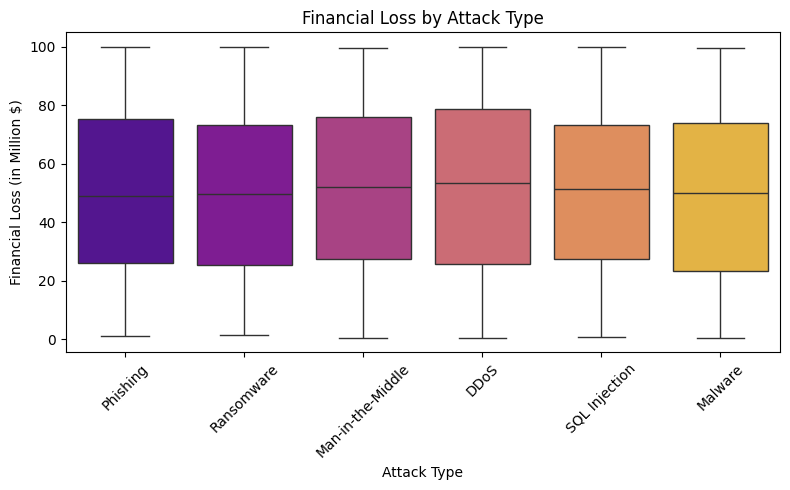

C:\Users\Nandini\AppData\Local\Temp\ipykernel_13628\1554572054.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Security Vulnerability Type', y='Number of Affected Users', data=df, palette="plasma")


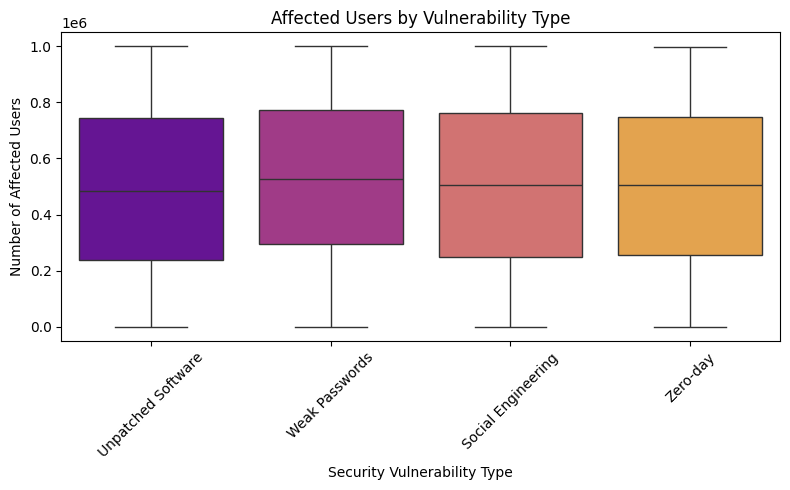

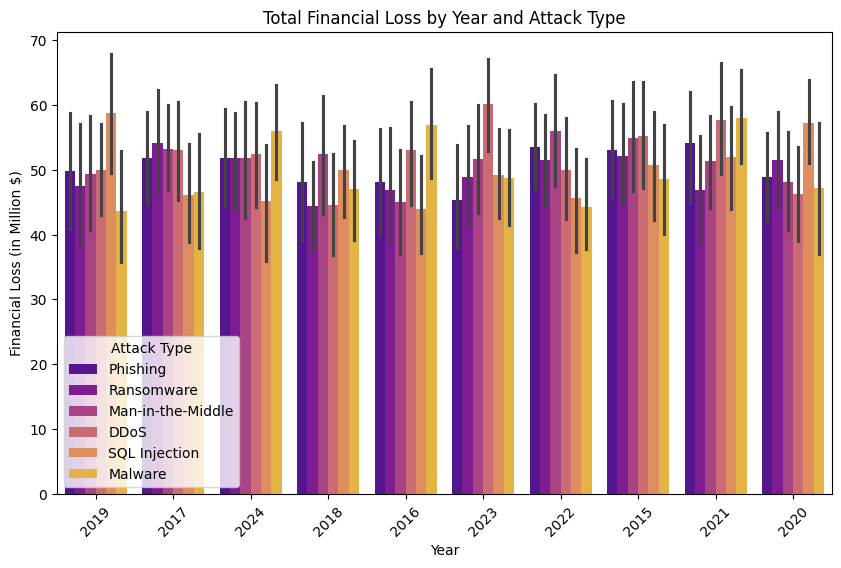

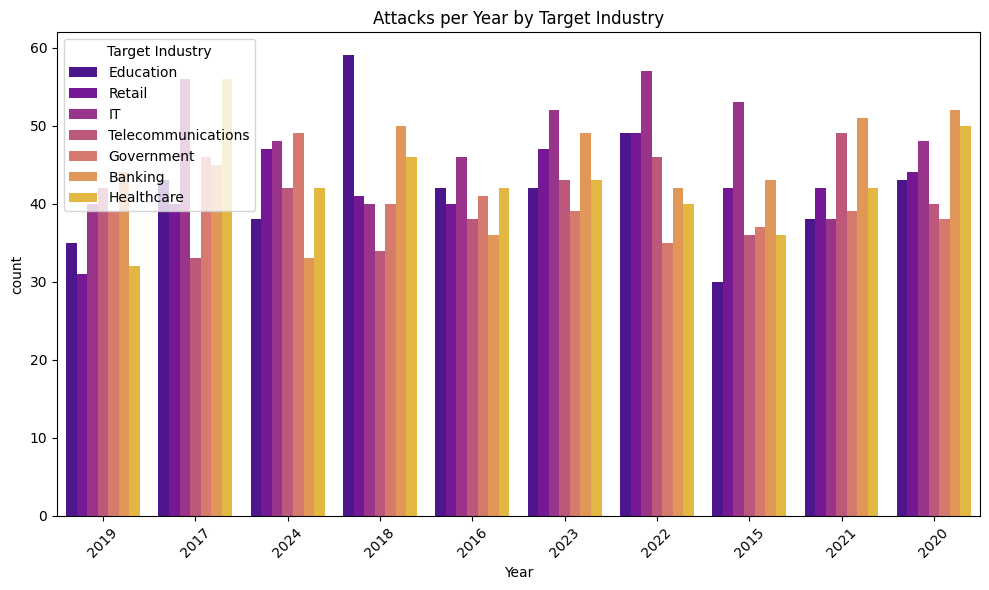

In [ ]:
# 1. Boxplot: Financial Loss by Attack Type
plt.figure(figsize=(8,5))
sns.boxplot(x='Attack Type', y='Financial Loss (in Million $)', data=df, palette="plasma")
plt.xticks(rotation=45)
plt.title("Financial Loss by Attack Type")
plt.tight_layout()
plt.show()

# 2. Boxplot: Affected Users by Vulnerability Type
plt.figure(figsize=(8,5))
sns.boxplot(x='Security Vulnerability Type', y='Number of Affected Users', data=df, palette="plasma")
plt.xticks(rotation=45)
plt.title("Affected Users by Vulnerability Type")
plt.tight_layout()
plt.show()

# 3. Barplot: Total Financial Loss by Year and Attack Type
plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Financial Loss (in Million $)', hue='Attack Type', data=df, palette="plasma")
plt.title("Total Financial Loss by Year and Attack Type")
plt.xticks(rotation=45)
plt.show()

# 4. Countplot: Attacks per Year by Target Industry
plt.figure(figsize=(10,6))
sns.countplot(x='Year', hue='Target Industry', data=df, palette="plasma")
plt.title("Attacks per Year by Target Industry")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bar chart shows frequency of categories

Time Series Trends :


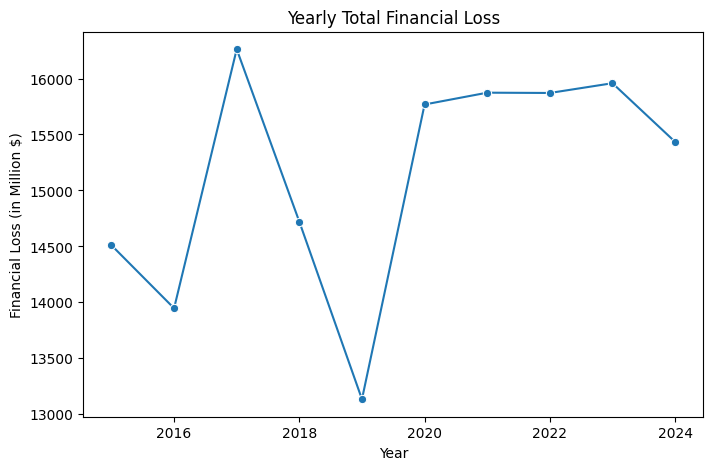

In [ ]:
yearly_loss = df.groupby('Year')['Financial Loss (in Million $)'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_loss, x='Year', y='Financial Loss (in Million $)', marker='o')
plt.title("Yearly Total Financial Loss")
plt.show()

Incident Resolution Analysis ;


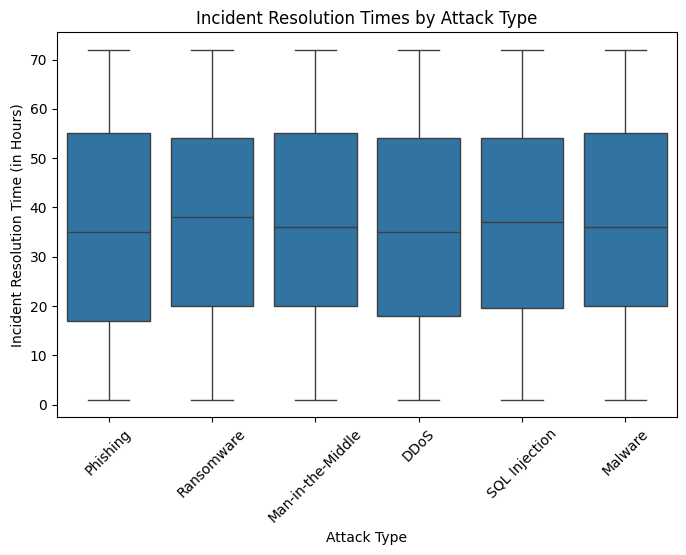

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attack Type', y='Incident Resolution Time (in Hours)', data=df)
plt.xticks(rotation=45)
plt.title("Incident Resolution Times by Attack Type")
plt.show()

One-Way ANOVA Results:
F-statistic: 0.625
P-value: 0.6806


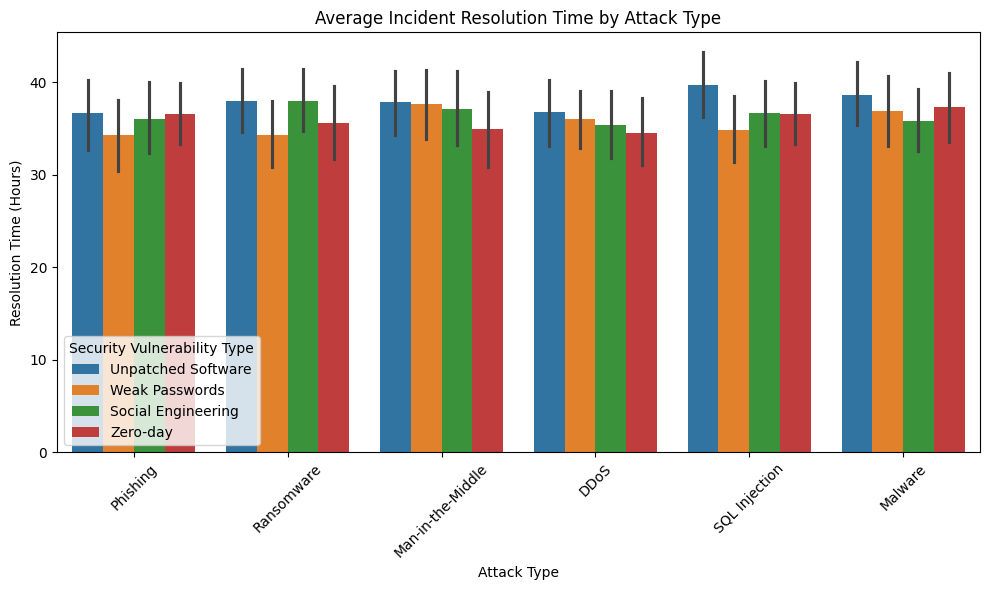

In [ ]:

import scipy.stats as stats

# Drop missing values in required columns
df_anova = df.dropna(subset=['Attack Type', 'Financial Loss (in Million $)'])

# Get the unique attack types
attack_types = df_anova['Attack Type'].unique()

# Group financial loss by attack type
groups = [df_anova[df_anova['Attack Type'] == atk]['Financial Loss (in Million $)'] for atk in attack_types]

# Run One-Way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("One-Way ANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(x='Attack Type', y='Incident Resolution Time (in Hours)', data=df,hue="Security Vulnerability Type")
plt.xticks(rotation=45)
plt.title("Average Incident Resolution Time by Attack Type")
plt.ylabel("Resolution Time (Hours)")
plt.xlabel("Attack Type")
plt.tight_layout()
plt.show()


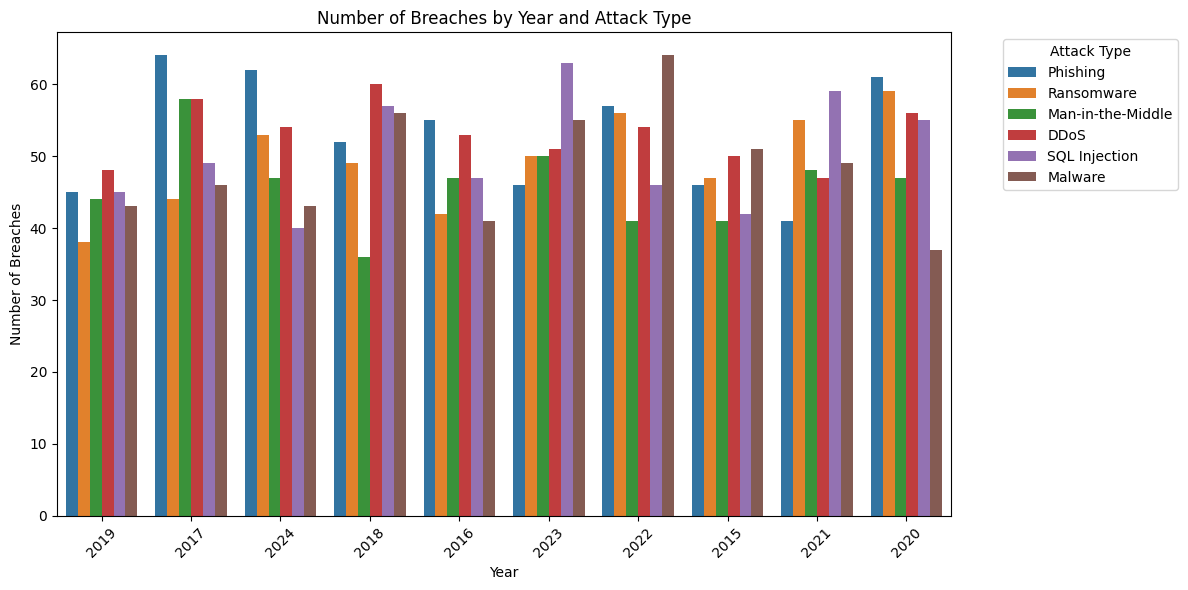

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure your 'Year' column is in the correct format (int or str)
df['Year'] = df['Year'].astype(str)

# Plot: Count of breaches per year grouped by attack type
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Attack Type', data=df)
plt.title("Number of Breaches by Year and Attack Type")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Breaches")
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


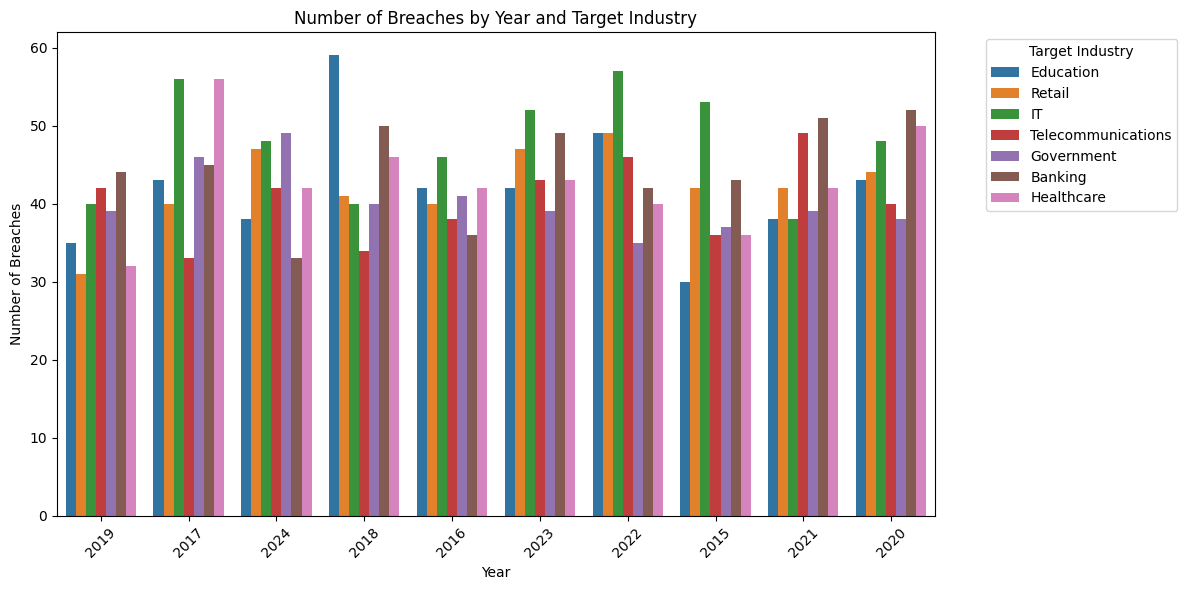

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Target Industry', data=df)
plt.title("Number of Breaches by Year and Target Industry")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Breaches")
plt.legend(title="Target Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


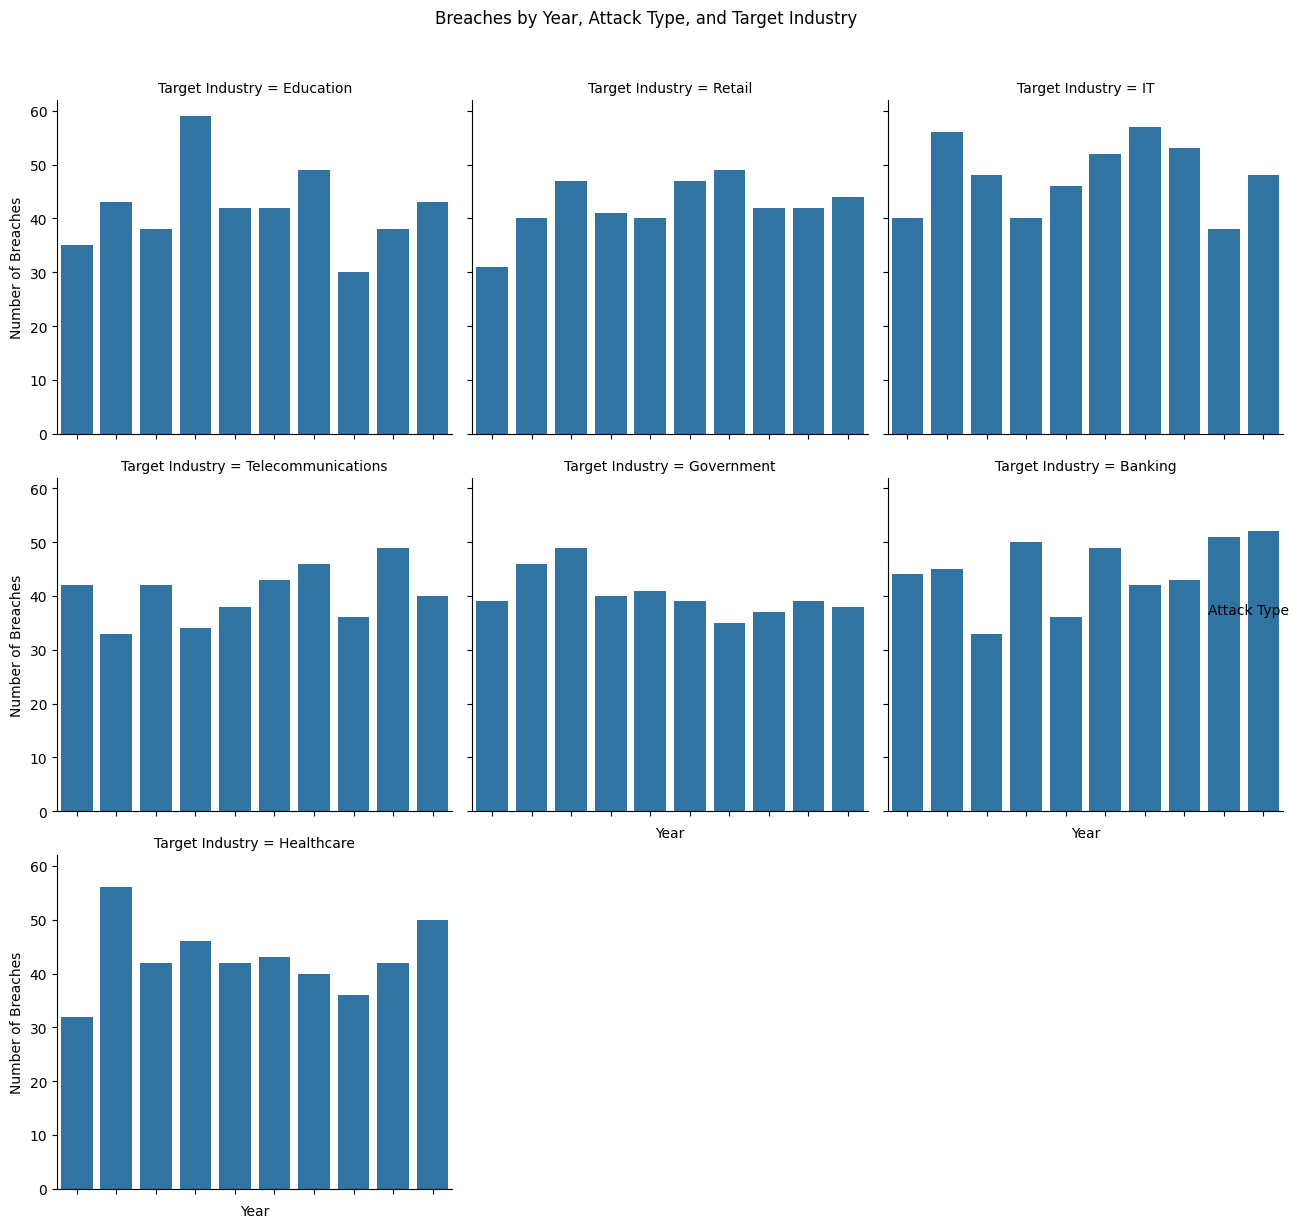

In [ ]:
g = sns.catplot(
    data=df,
    x='Year',
    col='Target Industry',
    kind='count',
    col_wrap=3,   
    height=4,
    
)

g.fig.suptitle("Breaches by Year, Attack Type, and Target Industry", y=1.02)
g.set_xticklabels(rotation=45)
g.set_axis_labels("Year", "Number of Breaches")
g.add_legend(title="Attack Type")
plt.tight_layout()
plt.show()



We visualize breaches by year, type of attack, and sector affected to identify key patterns and trends.


C:\Users\Nandini\AppData\Local\Temp\ipykernel_13628\3828995911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Year", data=df, palette="viridis")


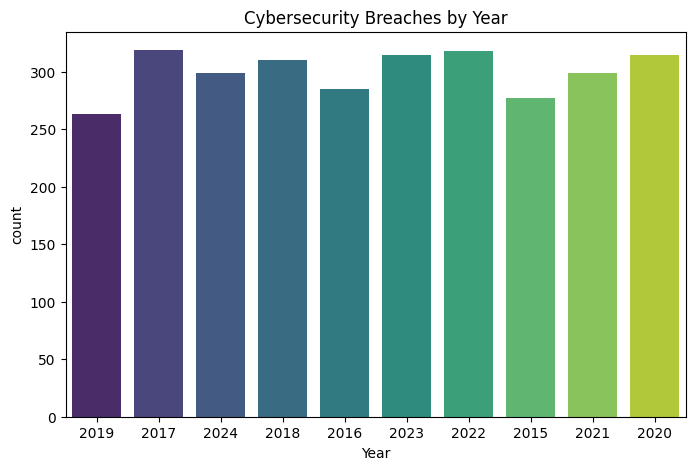

C:\Users\Nandini\AppData\Local\Temp\ipykernel_13628\3828995911.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attack Type", data=df, palette="viridis")


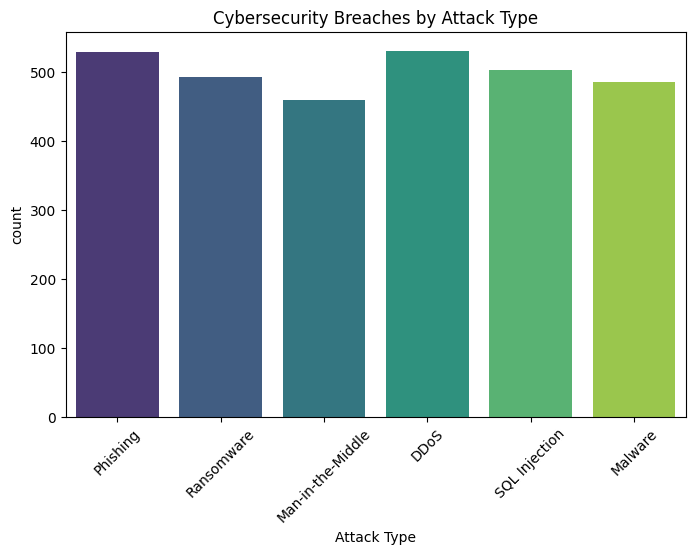

C:\Users\Nandini\AppData\Local\Temp\ipykernel_13628\3828995911.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Target Industry", data=df, palette="viridis")


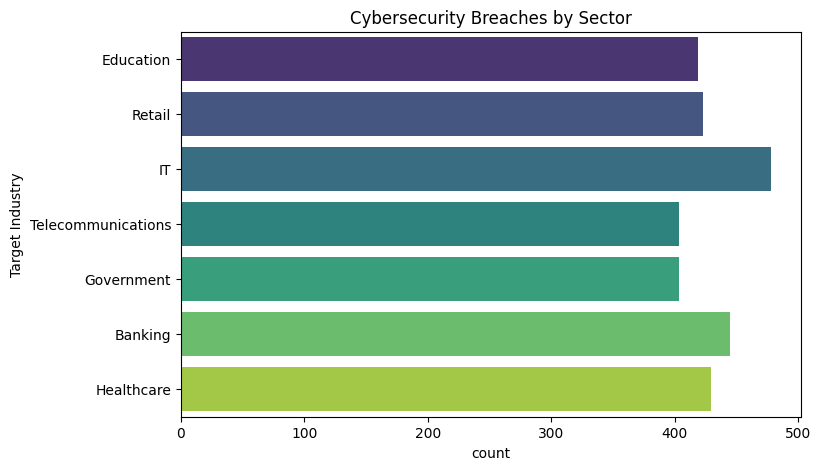

In [ ]:
# Breaches by Year
plt.figure(figsize=(8,5))
sns.countplot(x="Year", data=df, palette="viridis")
plt.title("Cybersecurity Breaches by Year")
plt.show()

# Breaches by Attack Type
plt.figure(figsize=(8,5))
sns.countplot(x="Attack Type", data=df, palette="viridis")
plt.title("Cybersecurity Breaches by Attack Type")
plt.xticks(rotation=45)
plt.show()

# Breaches by Sector
plt.figure(figsize=(8,5))
sns.countplot(y="Target Industry", data=df, palette="viridis")
plt.title("Cybersecurity Breaches by Sector")
plt.show()


### Insights
- Certain years show a sharp rise in breaches, indicating higher vulnerability trends.
- Phishing and Malware are the most common attack types, dominating over others.
- The Finance and Healthcare sectors face maximum attacks, suggesting they require stronger defenses.
